In [1]:
# Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import zipfile
import os

zip_file = "ECG5000.zip"
extract_dir = "data/"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [9]:
train_file = 'ECG5000_TRAIN.txt'
test_file = 'ECG5000_TEST.txt'
output_file = 'ecg_final.txt'

with open(train_file, 'r') as train, open(test_file, 'r') as test, open(output_file, 'w') as output:
    output.write(train.read())
    output.write(test.read())


In [10]:
# Importing the finla file in pandas dataframe
df = pd.read_csv('ecg_final.txt', sep = '  ', header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [11]:
df.shape


(5000, 141)

In [12]:
df.columns


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [13]:
# Adding prefix to column names so that we can easily reference them
# Original file did not contain column names so pandas creates numeric column names automatically that cannot be referenced easily 
df = df.add_prefix('c')

In [14]:
df.columns


Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [15]:
# Counting the data points of diffrent labels 
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [16]:
df.describe()


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [17]:
# splitting into train test data
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:, 0:1], test_size = 0.2, random_state = 111)
     

In [18]:
# Initializing a MinMax Scaler
scaler = MinMaxScaler()

# Fitting the train data to the scaler
data_scaled = scaler.fit(train_data)

In [19]:
# Scaling dataset according to weights of train data
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [20]:
train_data.shape


(4000, 141)

In [21]:
# Making pandas dataframe for the normal and anomaly train data points
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

In [22]:
anomaly_train_data


array([[0.54603684, 0.52609574, 0.35215565, ..., 0.32938752, 0.41559349,
        0.4550684 ],
       [0.39336652, 0.39486685, 0.27028019, ..., 0.37738131, 0.4863785 ,
        0.45174016],
       [0.66165586, 0.75136705, 0.70959038, ..., 0.15203245, 0.2072104 ,
        0.30963706],
       ...,
       [0.58122047, 0.57240472, 0.39287094, ..., 0.32309346, 0.41186439,
        0.40845571],
       [0.70698484, 0.7982501 , 0.77487296, ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.69314707, 0.79831145, 0.82004413, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [23]:
# Making pandas dataframe for the normal and anomaly test data points
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

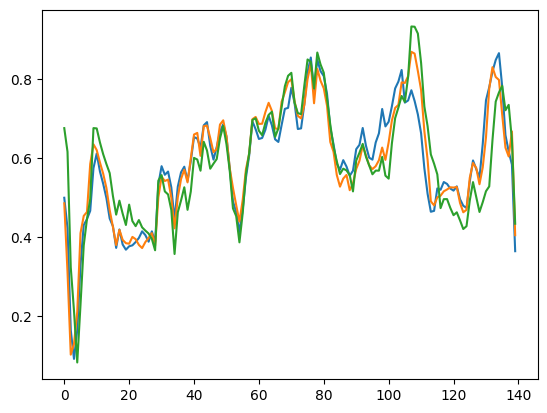

In [24]:
# plotting the first three normal data points
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

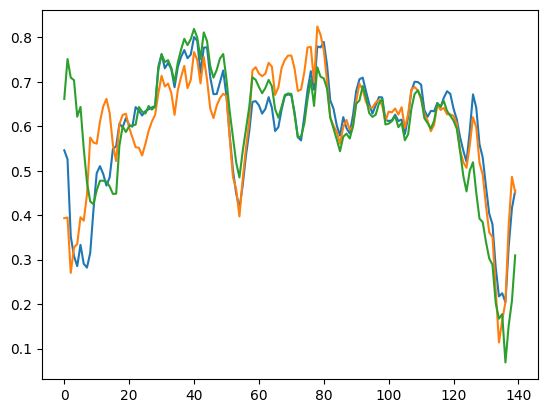

In [25]:
# plotting the first three anomaly data points
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [26]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = Sequential([
                                Dense(64, activation='relu'),
                                Dense(32, activation='relu'),
                                Dense(16, activation='relu'),
                                Dense(8, activation='relu')
    ])

    self.decoder = Sequential([
                               Dense(16, activation='relu'),
                               Dense(32, activation='relu'),
                               Dense(64, activation='relu'),
                               Dense(140, activation='sigmoid')
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [27]:

# Instantiating the Autoencoder
model = Autoencoder()

# creating an early_stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience = 2,
                               mode = 'min')

# Compiling the model
model.compile(optimizer = 'adam',
              loss = 'mae')

In [28]:
# Training the model
history = model.fit(normal_train_data,normal_train_data,
                    epochs = 50,
                    batch_size = 120,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle = True,
                    callbacks = [early_stopping])

Epoch 1/50
20/20 [==============================] - 6s 55ms/step - loss: 0.1239 - val_loss: 0.1056
Epoch 2/50
20/20 [==============================] - 0s 18ms/step - loss: 0.0716 - val_loss: 0.0785
Epoch 3/50
20/20 [==============================] - 0s 17ms/step - loss: 0.0516 - val_loss: 0.0764
Epoch 4/50
20/20 [==============================] - 0s 22ms/step - loss: 0.0483 - val_loss: 0.0757
Epoch 5/50
20/20 [==============================] - 0s 21ms/step - loss: 0.0477 - val_loss: 0.0747
Epoch 6/50
20/20 [==============================] - 0s 22ms/step - loss: 0.0475 - val_loss: 0.0738
Epoch 7/50
20/20 [==============================] - 0s 25ms/step - loss: 0.0472 - val_loss: 0.0733
Epoch 8/50
20/20 [==============================] - 0s 21ms/step - loss: 0.0471 - val_loss: 0.0731
Epoch 9/50
20/20 [==============================] - 0s 24ms/step - loss: 0.0467 - val_loss: 0.0722
Epoch 10/50
20/20 [==============================] - 0s 23ms/step - loss: 0.0453 - val_loss: 0.0684
Epoch 11/

In [29]:
# predictions for normal test data points
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [30]:
encoder_out.shape


(563, 8)

In [31]:
decoder_out.shape


(563, 140)

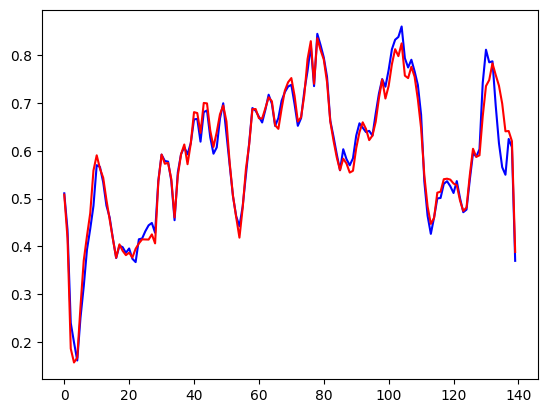

In [32]:
# plotting normal test data point and its predictiction by the autoencoder
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [33]:
# predictions for anomaly test data points
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

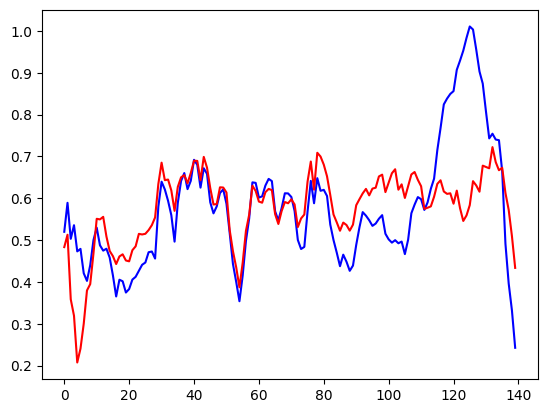

In [34]:
# plotting anomaly test data point and its predictiction by the autoencoder
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')

18/18 [==============================] - 0s 2ms/step


(array([129., 215.,  99.,  53.,  35.,  18.,   8.,   3.,   0.,   3.]),
 array([0.01159761, 0.0201285 , 0.02865938, 0.03719027, 0.04572116,
        0.05425204, 0.06278293, 0.07131381, 0.0798447 , 0.08837559,
        0.09690647]),
 <BarContainer object of 10 artists>)

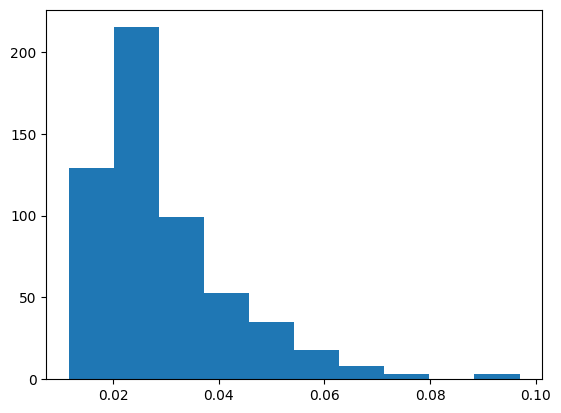

In [35]:
# reconstruction loss for normal test data
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

# Plotting histogram for recontruction loss for normal test data
plt.hist(train_loss, bins = 10)

In [36]:
np.mean(train_loss)


0.0294937541094448

In [37]:
np.std(train_loss)


0.012975888898675408

14/14 [==============================] - 0s 3ms/step


(array([  5.,  73., 220., 113.,  13.,   5.,   3.,   4.,   0.,   1.]),
 array([0.03796269, 0.0540581 , 0.07015351, 0.08624893, 0.10234434,
        0.11843975, 0.13453517, 0.15063058, 0.16672599, 0.1828214 ,
        0.19891682]),
 <BarContainer object of 10 artists>)

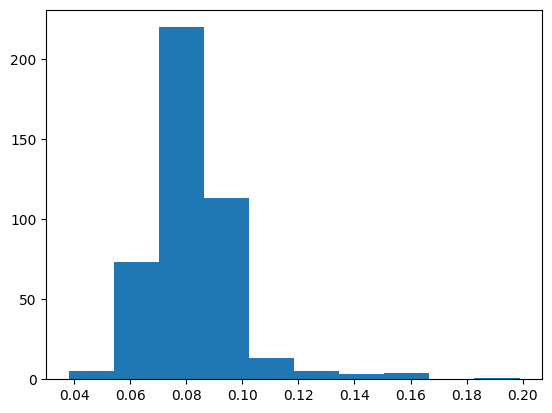

In [38]:
# reconstruction loss for anomaly test data
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

# Plotting histogram for recontruction loss for anomaly test data
plt.hist(train_loss_a, bins = 10)
     

In [39]:
np.mean(train_loss_a)


0.08227102826929304

In [40]:
np.std(train_loss_a)


0.01616682075998084

In [41]:
# setting threshold
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [42]:
threshold


0.05544553190679562

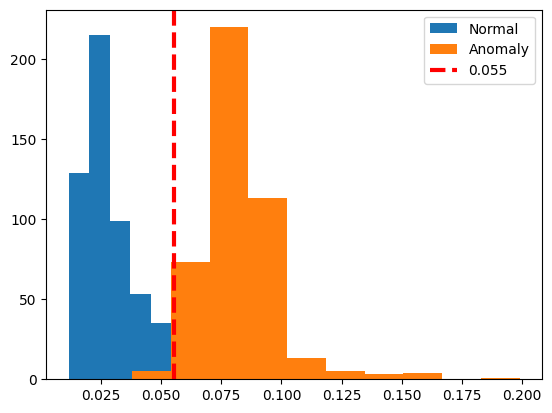

In [43]:
# Plotting the normal and anomaly losses with the threshold
plt.hist(train_loss, bins = 10, label = 'Normal')
plt.hist(train_loss_a, bins = 10, label = 'Anomaly')
plt.axvline(threshold, color='r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()
     

In [44]:
# Number of correct predictions for Normal test data  
preds = tf.math.less(train_loss, threshold)

In [45]:
tf.math.count_nonzero(preds)


<tf.Tensor: shape=(), dtype=int64, numpy=533>

In [46]:
# Number of correct predictions for Anomaly test data 
preds_a = tf.math.greater(train_loss_a, threshold)

In [47]:
tf.math.count_nonzero(preds_a)


<tf.Tensor: shape=(), dtype=int64, numpy=431>

In [48]:
preds_a.shape

TensorShape([437])